# Exploration of berries prices in the spanish market

### Cleanance

In [25]:
import pyodbc
import pandas as pd
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
connStr = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=bipro02\\adminbi;DATABASE=Prices;Trusted_Connection=yes')
cursor = connStr.cursor()

qry = "SELECT * FROM [Prices].[dbo].[prices] where cast([Country] as nvarchar) = cast('ES' as nvarchar)"
df_prices = pd.read_sql(qry, connStr)

df_prices.shape

(445, 11)

In [26]:
df_prices.head()
df_prices['Campaign_Date'] = df_prices['Year_campaign'].astype(str) + df_prices['Week_num_campaign'].astype(str)
# https://stackoverflow.com/questions/17087314/get-date-from-week-number
df_prices['Campaign_Date'] = df_prices['Campaign_Date'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y%W-%w"))
df_prices.head()

,Product,Price,Country,Currency,Measure,Date_ref,Week_desc,Week_num,Year_num,Week_num_campaign,Year_campaign,Campaign_Date
0,BLUEBERRIES,4.732598,ES,EUR,KG,2018-04-09,15-2018,15,2018,15,2018,2018-04-09
1,RASPBERRIES,4.640552,ES,EUR,KG,2015-12-28,53-2015,53,2015,18,2016,2016-05-02
2,RASPBERRIES,5.935458,ES,EUR,KG,2018-11-19,47-2018,47,2018,12,2019,2019-03-25
3,STRAWBERRIES,0.891319,ES,EUR,KG,2017-05-29,22-2017,22,2017,27,2017,2017-07-03
4,RASPBERRIES,6.286667,ES,EUR,KG,2018-11-26,48-2018,48,2018,13,2019,2019-04-01


In [27]:
blue = df_prices[(df_prices.Product=='BLUEBERRIES') & (df_prices.Year_campaign>2015) & (df_prices.Week_num_campaign<50)][['Campaign_Date', 'Price']]
blue.set_index('Campaign_Date',inplace=True)
blue.sort_index(inplace=True)

### Ploting

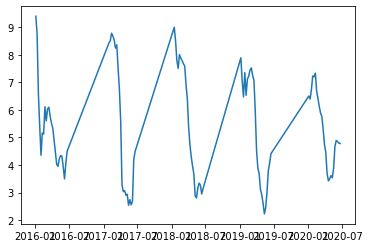

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.plot(blue)

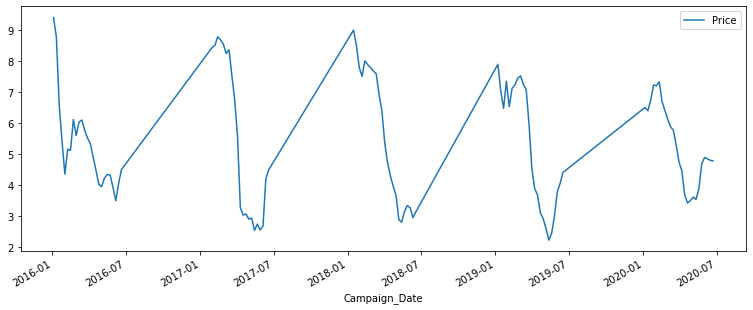

In [29]:
fig, ax = plt.subplots(figsize= (13,5))
blue.plot(ax=ax);

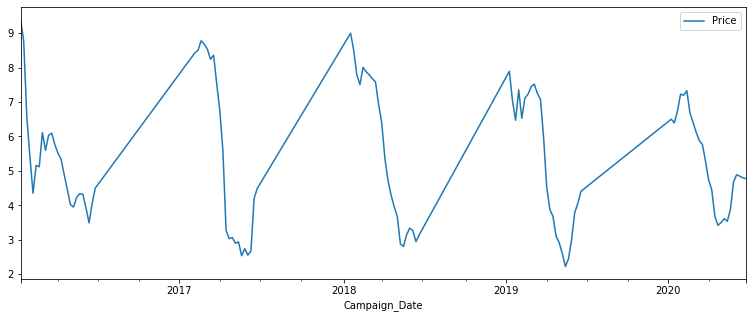

In [30]:
blue=blue.to_period('W')
fig, ax = plt.subplots(figsize= (13,5))
blue.plot(ax=ax);

In [31]:
for y in range(2017,2020):
    c = blue[blue.index.year==y]['Price'].reset_index()['Price'][0:21].corr(blue[blue.index.year==y+1].reset_index()['Price'][0:21])
    print(f'Correlations between campaigns {y} and {y+1}: {c}')

Correlations between campaigns 2017 and 2018: 0.8956249612699594
Correlations between campaigns 2018 and 2019: 0.9596971317866023
Correlations between campaigns 2019 and 2020: 0.9186404540673154


### ACF correlation function

In [32]:
from statsmodels.tsa.stattools import acf
acf(blue)

array([ 1.        ,  0.86099921,  0.69173673,  0.50769697,  0.3183467 ,
        0.14362857, -0.05023278, -0.23704666, -0.41540445, -0.56887328,
       -0.67815009, -0.73738619, -0.72095721, -0.63946176, -0.52961015,
       -0.39298038, -0.23239699, -0.05520099,  0.13565363,  0.30534631,
        0.42913097,  0.52142712,  0.56647676,  0.610923  ,  0.60311186,
        0.56430528,  0.46313799,  0.33730767,  0.20326501,  0.05632959,
       -0.0852541 , -0.21046385, -0.32860152, -0.42902487, -0.51421802,
       -0.54360395, -0.51022959, -0.44601947, -0.35997623, -0.25384561,
       -0.15235248])

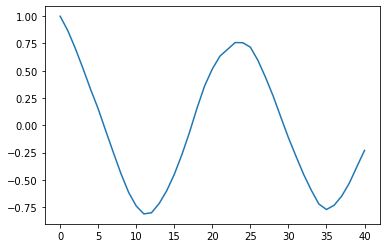

In [33]:
plt.plot(acf(blue,unbiased=True))

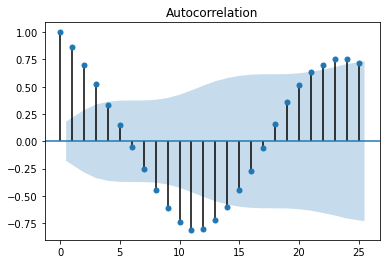

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(blue,lags=25,unbiased=True);

In [35]:
blue.groupby(blue.index.week).agg('count')

,Price
Campaign_Date,
1,1
2,3
3,4
4,4
5,5
6,5
7,5
8,5
9,5


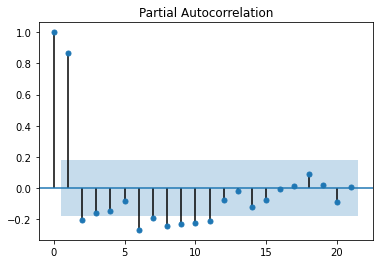

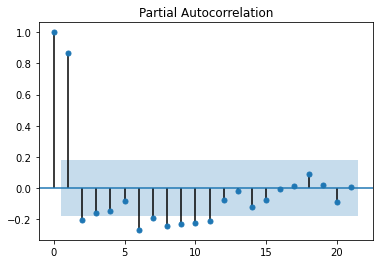

In [36]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(blue)